In [1]:
import pandas as pd # Для работы с табличными данными
import numpy as np # Для работы с массивами

import matplotlib # Для отрисовки графиков
import matplotlib.pyplot as plt # Для отрисовки графиков

from sklearn import preprocessing

# выбор темы картинок (необязательная строчка)
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

In [2]:
df = pd.read_csv('branch.dat', sep = ';',index_col = 'НАЗВАНИЕ', encoding = 'ANSI')
df

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,
Филиал 1,120,42,миним,лучше,5,Есть,Вывеска,1.00,49000
Филиал 2,80,18,средний,одинак,20,Нет,Витрина,0.95,24000
Филиал 3,240,54,макс,одинак,10,Есть,Св+Ви,1.05,125000
Филиал 4,160,57,средний,одинак,30,Нет,Световая,1.00,85000
Филиал 5,270,68,широкий,лучше,15,Есть,Св+Ви,1.05,130000
Филиал 6,100,28,средний,одинак,10,Есть,Вывеска,0.95,42000
Филиал 7,130,20,средний,хуже,5,Есть,Бедно,1.00,40000
Филиал 8,310,66,макс,лучше,25,Есть,Св+Ви,0.90,153000
Филиал 9,140,38,средний,лучше,10,Нет,Св+Ви,1.00,60000


In [3]:
df.АССОРТИМ.unique()

array(['миним  ', 'средний', 'макс   ', 'широкий'], dtype=object)

In [4]:
range_dict = {1:['миним  '],
             2:['средний'],
             3:['макс   ', 'широкий']}
for key,values in range_dict.items():
    df['АССОРТИМ'][df['АССОРТИМ'].isin(values)] = key
df

C:\Users\buhlo\AppData\Local\Temp/ipykernel_3832/1945813011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['АССОРТИМ'][df['АССОРТИМ'].isin(values)] = key


,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,
Филиал 1,120,42,1,лучше,5,Есть,Вывеска,1.00,49000
Филиал 2,80,18,2,одинак,20,Нет,Витрина,0.95,24000
Филиал 3,240,54,3,одинак,10,Есть,Св+Ви,1.05,125000
Филиал 4,160,57,2,одинак,30,Нет,Световая,1.00,85000
Филиал 5,270,68,3,лучше,15,Есть,Св+Ви,1.05,130000
Филиал 6,100,28,2,одинак,10,Есть,Вывеска,0.95,42000
Филиал 7,130,20,2,хуже,5,Есть,Бедно,1.00,40000
Филиал 8,310,66,3,лучше,25,Есть,Св+Ви,0.90,153000
Филиал 9,140,38,2,лучше,10,Нет,Св+Ви,1.00,60000


In [5]:
df.КОНКУРЕН.unique()

array(['лучше ', 'одинак', 'хуже  '], dtype=object)

In [6]:
riv_dict = {-1:['хуже  '],
             0:['одинак'],
             1:['лучше ']}
for key,values in riv_dict.items():
    df['КОНКУРЕН'][df['КОНКУРЕН'].isin(values)] = key
df

C:\Users\buhlo\AppData\Local\Temp/ipykernel_3832/2389452631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['КОНКУРЕН'][df['КОНКУРЕН'].isin(values)] = key


,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,
Филиал 1,120,42,1,1,5,Есть,Вывеска,1.00,49000
Филиал 2,80,18,2,0,20,Нет,Витрина,0.95,24000
Филиал 3,240,54,3,0,10,Есть,Св+Ви,1.05,125000
Филиал 4,160,57,2,0,30,Нет,Световая,1.00,85000
Филиал 5,270,68,3,1,15,Есть,Св+Ви,1.05,130000
Филиал 6,100,28,2,0,10,Есть,Вывеска,0.95,42000
Филиал 7,130,20,2,-1,5,Есть,Бедно,1.00,40000
Филиал 8,310,66,3,1,25,Есть,Св+Ви,0.90,153000
Филиал 9,140,38,2,1,10,Нет,Св+Ви,1.00,60000


In [7]:
df.КОНСУЛЬТ.unique()

array(['Есть', 'Нет '], dtype=object)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Филиал 1  to Филиал 20
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ПЛОЩАДЬ   20 non-null     int64  
 1   ПРОХОДИМ  20 non-null     int64  
 2   АССОРТИМ  20 non-null     object 
 3   КОНКУРЕН  20 non-null     object 
 4   МЕТРО     20 non-null     int64  
 5   КОНСУЛЬТ  20 non-null     object 
 6   ДИЗАЙН    20 non-null     object 
 7   ЦЕНЫ      20 non-null     float64
 8   ПРОДАЖИ   20 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.6+ KB


In [9]:
df.shape

(20, 9)

In [10]:
for i in range(20):
    if df.КОНСУЛЬТ[i] == 'Есть':
        df.КОНСУЛЬТ[i] = 1
    else:
        df.КОНСУЛЬТ[i] = 0
df

C:\Users\buhlo\AppData\Local\Temp/ipykernel_3832/2580002723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.КОНСУЛЬТ[i] = 1
C:\Users\buhlo\AppData\Local\Temp/ipykernel_3832/2580002723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.КОНСУЛЬТ[i] = 0


,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,
Филиал 1,120,42,1,1,5,1,Вывеска,1.00,49000
Филиал 2,80,18,2,0,20,0,Витрина,0.95,24000
Филиал 3,240,54,3,0,10,1,Св+Ви,1.05,125000
Филиал 4,160,57,2,0,30,0,Световая,1.00,85000
Филиал 5,270,68,3,1,15,1,Св+Ви,1.05,130000
Филиал 6,100,28,2,0,10,1,Вывеска,0.95,42000
Филиал 7,130,20,2,-1,5,1,Бедно,1.00,40000
Филиал 8,310,66,3,1,25,1,Св+Ви,0.90,153000
Филиал 9,140,38,2,1,10,0,Св+Ви,1.00,60000


In [11]:
df.ДИЗАЙН.unique()

array(['Вывеска ', 'Витрина ', 'Св+Ви   ', 'Световая', 'Бедно   ',
       'Вы+Ви   '], dtype=object)

In [48]:
design_dict = {0:['Вывеска ','Бедно   '],
             1:['Световая'],
             2:['Витрина '],
             3:['Вы+Ви   '],
             4:['Св+Ви   ']}
for key,values in design_dict.items():
    df['ДИЗАЙН'][df['ДИЗАЙН'].isin(values)] = key
df

C:\Users\buhlo\AppData\Local\Temp/ipykernel_3832/2239531273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ДИЗАЙН'][df['ДИЗАЙН'].isin(values)] = key


,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,
Филиал 1,120,42,1,1,5,1,0,1.00,49000
Филиал 2,80,18,2,0,20,0,1,0.95,24000
Филиал 3,240,54,3,0,10,1,4,1.05,125000
Филиал 4,160,57,2,0,30,0,2,1.00,85000
Филиал 5,270,68,3,1,15,1,4,1.05,130000
Филиал 6,100,28,2,0,10,1,0,0.95,42000
Филиал 7,130,20,2,-1,5,1,0,1.00,40000
Филиал 8,310,66,3,1,25,1,4,0.90,153000
Филиал 9,140,38,2,1,10,0,4,1.00,60000


In [13]:
df.convert_dtypes()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,
Филиал 1,120,42,1,1,5,1,0,1.0,49000
Филиал 2,80,18,2,0,20,0,1,0.95,24000
Филиал 3,240,54,3,0,10,1,4,1.05,125000
Филиал 4,160,57,2,0,30,0,2,1.0,85000
Филиал 5,270,68,3,1,15,1,4,1.05,130000
Филиал 6,100,28,2,0,10,1,0,0.95,42000
Филиал 7,130,20,2,-1,5,1,0,1.0,40000
Филиал 8,310,66,3,1,25,1,4,0.9,153000
Филиал 9,140,38,2,1,10,0,4,1.0,60000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Филиал 1  to Филиал 20
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ПЛОЩАДЬ   20 non-null     int64  
 1   ПРОХОДИМ  20 non-null     int64  
 2   АССОРТИМ  20 non-null     object 
 3   КОНКУРЕН  20 non-null     object 
 4   МЕТРО     20 non-null     int64  
 5   КОНСУЛЬТ  20 non-null     object 
 6   ДИЗАЙН    20 non-null     object 
 7   ЦЕНЫ      20 non-null     float64
 8   ПРОДАЖИ   20 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 2.1+ KB


In [50]:
#norm = preprocessing.StandardScaler()
norm = preprocessing.MaxAbsScaler()
# norm = preprocessing.MinMaxScaler()
df_1 = df.copy()
del df_1['ПРОДАЖИ']
# вычисляем параметры нормализации (они будут сохранены внутри объекта norm)
norm.fit(df_1)
# преобразовываем данные с параметрами
X = norm.transform(df_1)
# Полученный на предыдущем шаге объект X - это матрица класса numpy.ndarray.
# Глазами на неё смотреть неудобно, лучше преобразовать её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index = df_1.index, columns = df_1.columns)
X

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ
НАЗВАНИЕ,,,,,,,,
Филиал 1,0.387097,0.617647,0.333333,1.0,0.142857,1.0,0.00,0.909091
Филиал 2,0.258065,0.264706,0.666667,0.0,0.571429,0.0,0.25,0.863636
Филиал 3,0.774194,0.794118,1.000000,0.0,0.285714,1.0,1.00,0.954545
Филиал 4,0.516129,0.838235,0.666667,0.0,0.857143,0.0,0.50,0.909091
Филиал 5,0.870968,1.000000,1.000000,1.0,0.428571,1.0,1.00,0.954545
Филиал 6,0.322581,0.411765,0.666667,0.0,0.285714,1.0,0.00,0.863636
Филиал 7,0.419355,0.294118,0.666667,-1.0,0.142857,1.0,0.00,0.909091
Филиал 8,1.000000,0.970588,1.000000,1.0,0.714286,1.0,1.00,0.818182
Филиал 9,0.451613,0.558824,0.666667,1.0,0.285714,0.0,1.00,0.909091


In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [51]:
link = linkage(X, 'ward', 'euclidean')
link

array([[ 5.        , 11.        ,  0.31397481,  2.        ],
       [10.        , 19.        ,  0.33768168,  2.        ],
       [ 4.        ,  7.        ,  0.34313564,  2.        ],
       [ 9.        , 17.        ,  0.40067452,  2.        ],
       [18.        , 20.        ,  0.40826383,  3.        ],
       [ 2.        , 14.        ,  0.51891165,  2.        ],
       [ 6.        , 15.        ,  0.64055623,  2.        ],
       [12.        , 21.        ,  0.71704338,  3.        ],
       [ 1.        ,  3.        ,  0.73602449,  2.        ],
       [ 8.        , 16.        ,  0.84330895,  2.        ],
       [ 0.        , 13.        ,  0.85136122,  2.        ],
       [23.        , 28.        ,  1.15370484,  4.        ],
       [22.        , 25.        ,  1.46148326,  4.        ],
       [29.        , 30.        ,  1.57547422,  4.        ],
       [24.        , 26.        ,  1.68311067,  5.        ],
       [32.        , 33.        ,  2.15940351,  8.        ],
       [27.        , 31.

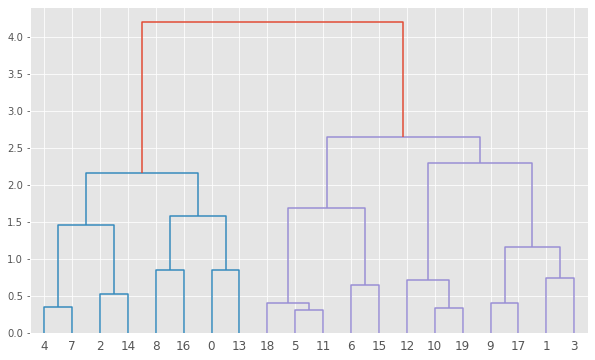

In [52]:
plt.figure(figsize = (10,6)) # Размер графика
dn_den = dendrogram(link)

In [81]:
#X['Кластер'] = fcluster(link, 3, criterion = 'distance')
df_1['Кластер'] = fcluster(link, 2, criterion = 'maxclust')
df_1['ПРОДАЖИ'] = df['ПРОДАЖИ']
df_1

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,Кластер,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,,
Филиал 1,120,42,1,1,5,1,0,1.00,1,49000
Филиал 2,80,18,2,0,20,0,1,0.95,2,24000
Филиал 3,240,54,3,0,10,1,4,1.05,1,125000
Филиал 4,160,57,2,0,30,0,2,1.00,2,85000
Филиал 5,270,68,3,1,15,1,4,1.05,1,130000
Филиал 6,100,28,2,0,10,1,0,0.95,2,42000
Филиал 7,130,20,2,-1,5,1,0,1.00,2,40000
Филиал 8,310,66,3,1,25,1,4,0.90,1,153000
Филиал 9,140,38,2,1,10,0,4,1.00,1,60000


In [ ]:
df_1.АССОРТИМ=pd.to_numeric(df_1.АССОРТИМ,errors='coerce')
df_1.КОНКУРЕН=pd.to_numeric(df_1.КОНКУРЕН,errors='coerce')
df_1.КОНСУЛЬТ=pd.to_numeric(df_1.КОНСУЛЬТ,errors='coerce')
df_1.ДИЗАЙН=pd.to_numeric(df_1.ДИЗАЙН,errors='coerce')

In [82]:
df_1.groupby('Кластер').mean()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
Кластер,,,,,,,,,
1,203.750000,50.125000,2.500000,0.750000,13.75,0.750000,2.875,0.987500,88000.000000
2,136.666667,32.166667,2.083333,-0.416667,16.25,0.416667,1.000,0.991667,44916.666667


Модель поделила на 2 кластера:
1 содержит в себе филиалы с высокими продажами;
2 содержит в себе филиалы с низкими продажами.

In [83]:
df_1.groupby('Кластер').size()

Кластер
1     8
2    12
dtype: int64

In [113]:
df_knn = df_1.copy()
del df_knn['Кластер']
del df_knn['ПРОДАЖИ']

In [114]:
df_knn

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ
НАЗВАНИЕ,,,,,,,,
Филиал 1,120,42,1,1,5,1,0,1.00
Филиал 2,80,18,2,0,20,0,1,0.95
Филиал 3,240,54,3,0,10,1,4,1.05
Филиал 4,160,57,2,0,30,0,2,1.00
Филиал 5,270,68,3,1,15,1,4,1.05
Филиал 6,100,28,2,0,10,1,0,0.95
Филиал 7,130,20,2,-1,5,1,0,1.00
Филиал 8,310,66,3,1,25,1,4,0.90
Филиал 9,140,38,2,1,10,0,4,1.00


In [102]:
from sklearn.cluster import KMeans
# Инициализация модели
model = KMeans(n_clusters = 2, random_state = 42)

In [103]:
model.fit(df_knn)

KMeans(n_clusters=2, random_state=42)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


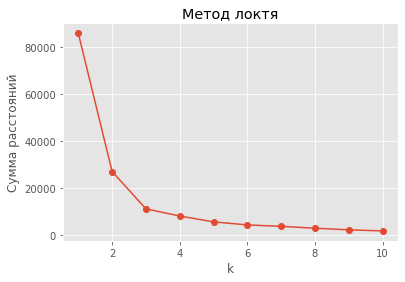

In [115]:
K = range(1, 11)
models = [KMeans(n_clusters = k, random_state = 42).fit(df_knn) for k in K]
dist = [model.inertia_ for model in models]

# Построение локтя
plt.plot(K, dist, marker = 'o') 
plt.xlabel('k')
plt.ylabel('Сумма расстояний')
plt.title('Метод локтя')
plt.show()

In [116]:
model = KMeans(n_clusters = 3, random_state = 42)
del df_knn['Кластер']
del df_knn['ПРОДАЖИ']
model.fit(df_knn)
df_knn['Кластер'] = model.labels_
df_knn['ПРОДАЖИ'] = df['ПРОДАЖИ']
df_knn.groupby('Кластер').mean()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
Кластер,,,,,,,,,
0,112.0,29.600000,1.8,-0.1,16.000000,0.4,0.700000,0.975,37100.0
1,267.5,61.500000,3.0,0.5,18.750000,1.0,3.750000,0.975,125750.0
2,180.0,40.833333,2.5,0.0,11.666667,0.5,2.166667,1.025,61500.0


Данная же модель выделила 3 кластера:
0 Кластер с низким уровнем продаж,
1 С высоким уровнем продаж,
3

In [117]:
df_knn.groupby('Кластер').size()

Кластер
0    10
1     4
2     6
dtype: int64